![](http://media.foxbusiness.com/BrightCove/854081161001/201910/33/854081161001_6093736038001_6093735925001-vs.jpg)

# Background:

During the past couple of years, Netflix has come forth as a pioneer in the field of online entertainment. Offering popular shows and movies, which can be accessed from any device in the world for a minimal fee, the history of Netflix shows that it revolutionized the industry with its radical method. 

Throughout the course of the few years many of us have asked the question, "What to watch next?"

This kernel is a foray into the world of basic recommender systems, their working and tries to answer the question ringing in all our minds. 

# What's in this kernel:

1. [Loading required libraries, with installation](#1)
2. [Getting basic ideas about the data](#2)
3. [Exploratory Data Analysis](#3)
4. [The Recommender Systems Age](#4)

## Loading required libraries with installation. <a id="1"></a> <br>

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from tqdm import tqdm, tqdm_notebook
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns
import plotly.offline as py
import plotly.tools as tls
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
import palettable
from IPython.display import HTML
import json
from  altair.vega import v5
import plotly.figure_factory as ff
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import altair as alt
from collections import Counter

In [ ]:
stop =["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder"]


## Getting basic ideas about the data  <a id="2"></a> <br>

In [ ]:
df = pd.read_csv('../input/netflix-shows/netflix_titles.csv')

#### Adding basic new features:

In [ ]:
#Taken From: https://www.kaggle.com/shivamb/netflix-shows-and-movies-exploratory-analysis

df['date_added'] = pd.to_datetime(df.date_added)
df['year_added'] = df.date_added.dt.year
df['month_added'] = df.date_added.dt.month

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)


In [ ]:
df.head()

#### Columns Description: 

- **show_id**     : Contains the unique ID for each movie/series
- **title**       : Contains the titles of the particular movie/series
- **director**    : Contains the director of the particular programme.
- **case**        : The actors who took part in the movie
- **country**     : The country of origin for the show.
- **date_added**  : The date at which the programme was added on the platform
- **release_year**: The year when the programme was released
- **rating**      : The advised viewer rating for the given programmes
- **duration**    : The running duration for a movie.
- **listed_in**   : The popular platfors where the programme is listed as a must watch.
- **description** : The short description of the show.
- **type**        : The type of programme: Tv Show or a Movie.
- **year_added**  : The year the programme was added on Netflix
- **month_added** : The month the programme was added on Netflix
- **season_count**: The number of seasons for the particular TV show.

In [ ]:
#Finding Number of rows and columns
print("Dataset contains {} rows and {} columns".format(df.shape[0], df.shape[1]))


#### Number of NULL values for the columns:

In [ ]:
df.isnull().sum()

# Exploratory Data Analysis<a id="3"></a> <br>

In [ ]:
##-----------------------------------------------------------
# This whole section 
vega_url = 'https://cdn.jsdelivr.net/npm/vega@' + v5.SCHEMA_VERSION
vega_lib_url = 'https://cdn.jsdelivr.net/npm/vega-lib'
vega_lite_url = 'https://cdn.jsdelivr.net/npm/vega-lite@' + alt.SCHEMA_VERSION
vega_embed_url = 'https://cdn.jsdelivr.net/npm/vega-embed@3'
noext = "?noext"

paths = {
    'vega': vega_url + noext,
    'vega-lib': vega_lib_url + noext,
    'vega-lite': vega_lite_url + noext,
    'vega-embed': vega_embed_url + noext
}

workaround = """
requirejs.config({{
    baseUrl: 'https://cdn.jsdelivr.net/npm/',
    paths: {}
}});
"""

#------------------------------------------------ Defs for future rendering
def add_autoincrement(render_func):
    # Keep track of unique <div/> IDs
    cache = {}
    def wrapped(chart, id="vega-chart", autoincrement=True):
        if autoincrement:
            if id in cache:
                counter = 1 + cache[id]
                cache[id] = counter
            else:
                cache[id] = 0
            actual_id = id if cache[id] == 0 else id + '-' + str(cache[id])
        else:
            if id not in cache:
                cache[id] = 0
            actual_id = id
        return render_func(chart, id=actual_id)
    # Cache will stay outside and 
    return wrapped
            
@add_autoincrement
def render(chart, id="vega-chart"):
    chart_str = """
    <div id="{id}"></div><script>
    require(["vega-embed"], function(vg_embed) {{
        const spec = {chart};     
        vg_embed("#{id}", spec, {{defaultStyle: true}}).catch(console.warn);
        console.log("anything?");
    }});
    console.log("really...anything?");
    </script>
    """
    return HTML(
        chart_str.format(
            id=id,
            chart=json.dumps(chart) if isinstance(chart, dict) else chart.to_json(indent=None)
        )
    )



HTML("".join((
    "<script>",
    workaround.format(json.dumps(paths)),
    "</script>")))

In [ ]:
# Necessary Functions: 
def pie_plot(labels, values, colors, title):
    fig = {
      "data": [
        {
          "values": values,
          "labels": labels,
          "domain": {"x": [0, .48]},
          "name": "Job Type",
          "sort": False,
          "marker": {'colors': colors},
          "textinfo":"percent+label+value",
          "textfont": {'color': '#FFFFFF', 'size': 10},
          "hole": .6,
          "type": "pie"
        } ],
        "layout": {
            "title":title,
            "annotations": [
                {
                    "font": {
                        "size": 25,

                    },
                    "showarrow": False,
                    "text": ""

                }
            ]
        }
    }
    return fig


def word_cloud(df, pixwidth=6000, pixheight=350, column="index", counts="count"):
    data= [dict(name="dataset", values=df.to_dict(orient="records"))]
    wordcloud = {
        "$schema": "https://vega.github.io/schema/vega/v5.json",
        "width": pixwidth,
        "height": pixheight,
        "padding": 0,
        "title": "Hover to see number of occureances from all the sequences",
        "data": data
    }
    scale = dict(
        name="color",
        type="ordinal",
        range=["cadetblue", "royalblue", "steelblue", "navy", "teal"]
    )
    mark = {
        "type":"text",
        "from":dict(data="dataset"),
        "encode":dict(
            enter=dict(
                text=dict(field=column),
                align=dict(value="center"),
                baseline=dict(value="alphabetic"),
                fill=dict(scale="color", field=column),
                tooltip=dict(signal="datum.count + ' occurrances'")
            )
        ),
        "transform": [{
            "type": "wordcloud",
            "text": dict(field=column),
            "size": [pixwidth, pixheight],
            "font": "Helvetica Neue, Arial",
            "fontSize": dict(field="datum.{}".format(counts)),
            "fontSizeRange": [10, 60],
            "padding": 2
        }]
    }
    wordcloud["scales"] = [scale]
    wordcloud["marks"] = [mark]
    
    return wordcloud

from collections import defaultdict

def wordcloud_create(df):
    ult = {}
    corpus = df.description.values.tolist()
    final = defaultdict(int) #Declaring an empty dictionary for count (Saves ram usage)
    for words in corpus:
        for word in words.split():
             final[word]+=1
    temp = Counter(final)
    for k, v in  temp.most_common(200):
        ult[k] = v
    corpus = pd.Series(ult) #Creating a dataframe from the final default dict
    return render(word_cloud(corpus.to_frame(name="count").reset_index(), pixheight=600, pixwidth=900))



### What kind of content does Netflix have the most?

In [ ]:
value_counts = df['type'].value_counts()
labels = value_counts.index.tolist()
py.iplot(pie_plot(labels, value_counts,['#1B9E77', '#7570B3'], "Type Distribution"))

This shows that nearly 67% or 2/3 of the content of Netflix is Movies, rather than TV shows.


### Which Country Releases the Most Number of Titles?

In [ ]:
top_work_unitdf = df['country'].value_counts().rename_axis('Country').reset_index(name='counts')[:10]

fig = px.bar(top_work_unitdf, y="Country", x='counts', orientation='h', title = "Country with the most number of titles",color=  "counts", color_continuous_scale=px.colors.qualitative.Prism).update_yaxes(categoryorder="total ascending")

fig.show()

We can observe that the United States has the most number of Titles, followed by India and the United Kingdom.

## Usually Which Month has the most number of releases?


In [ ]:
top_months = df['month_added'].value_counts().rename_axis('Month_Added').reset_index(name='counts')

fig = px.bar(top_months, y="counts", x='Month_Added', title = "Country with the most number of titles",color=  "counts", color_continuous_scale=px.colors.qualitative.D3).update_yaxes(categoryorder="total ascending")

fig.show()

We can observe that usually most content is added near the end of the year, taking the highest dip around the mid summer months, where the content is around the lowest. 

### The duration of a movie on average.

In [ ]:
mov = df[df.type =='Movie']
mov_dur = mov['duration'].fillna(0.0).astype(float)
ff.create_distplot([mov_dur], ['y'], bin_size=0.5, colors=['#1B9E77']).show()

It can be observed that most of the movies would be around 80-100 minutes, with the peak being around an hour and thirty six minutes, proclaiming that people don't prefer many movies above two hours.

### The growth of Netflix's library over the years.

In [ ]:
tv = df[df["type"] == "TV Show"]
mov = df[df["type"] == "Movie"]

col = "year_added"

df1 = tv[col].value_counts().reset_index()
df1 = df1.rename(columns = {col : "count", "index" : col})
df1 = df1.sort_values(col)

df2 = mov[col].value_counts().reset_index()
df2 = df2.rename(columns = {col : "count", "index" : col})
df2 = df2.sort_values(col)

trace1 = go.Scatter(x=df1[col], y=df1["count"], name="TV Shows", marker=dict(color="#1B9E77"), )
trace2 = go.Scatter(x=df2[col], y=df2["count"], name="Movies", marker=dict(color="#7570B3"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.8, y=1.2, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

The addition of TV shows seems to have been on a continuous rise, slowly increasing the number of shows present in the reportire of Netflix. 

### Which words are the most prevelant in the descriptions?

In [ ]:
wordcloud_create(df)

It can be observed that there ae a lot of words present which need to be removed, i.e, the stop words for the entire description text. The next step would be to remove them and create the final wordcloud. 

In [ ]:
df['description']= df['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
wordcloud_create(df)

We can observe the particular keywords now, where docuumentary, friends, family and comedy are some of the most popular words present in the description. 

# The Recommender Systems Age: <a id="4"></a> <br>

Data has been growing at a rapid pace for the past few years. Video content in particular has savoured a particular boom. A regular person can't even begin to sent a dent in the humongous amount of videos present out there. 

Usually, people tend to watch shows which match the current show they are watching. Or something in particular. For the given dataset, the plan is to recommend shows/movies based on the description of the programme. 

This kind of information system engineering is termed as Recommender Systems.

Usually, recommender systems are of three types:
- **Demographic Filtering**:
    - They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.
    
- **Content Based Filtering**:
    - They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it

- **Collaborative Filtering**:
    - This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.
    
    
    
The general idea for the recommender system for this particular dataset is to create a simple content based filtering based upon the descriptions, then building upon top of that in the upcoming versions.


## Content Based Filtering:

We will compute plot based content similarity of the descriptions and recommend the movies based on the similarity score. 

The workflow of the recommender system would be as follows:
- Convert the words into their respective Term Frequency - Inverse Document Frequency Score. 

     - Term Frequency: Term instances/ Total instances
     - IDF: log(number of documents/documents with the term)
      
     - The overall importance of this comes into play as they tend to focus on the rare keywords more than the frequently occuring words, assigning a higher value to the particular rare keywords. The final formula would boil down to TF * IDF. It is usually also used to convert the text into sparse matrices, which could easily be feeded into models.

In [ ]:

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['description'] = df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

We can observe that over 15k words were used to describe the 5.8k unique programmes.

Now, we can use a metric such as cosine similarity to gather the programmes closest to the movies entered. 

**Cosine Similarity**

We use it to calculate the numeric similarity between the various matrices, it is used in this kernel for the fast calculation for the basic recommender model. 

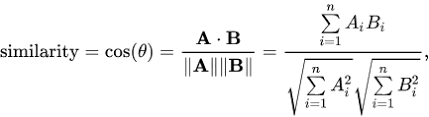

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

Now that we have the cosine similarity scores, we will create a revese map to attach the programme from the user input and gives the rest 'n' programmes, where the user tells the number of shows he wants to see, where the default is 10. 

In [ ]:
names = pd.Series(df.index, index=df['title']).drop_duplicates()

In [ ]:
def get_recommendations(title, number=10, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    mov = names[title]

    # Get the pairwsie similarity scores of all movies with that movie
    score = list(enumerate(cosine_sim[mov]))

    # Sort the movies based on the similarity scores
    score = sorted(score, key=lambda x: x[1], reverse=True)

    # Get the scores of the n most similar movies
    score = score[1:number]

    # Get the movie indices
    movie_indices = [i[0] for i in score]

    # Return the top n most similar movies
    return df['title'].iloc[movie_indices]

In [ ]:
get_recommendations('MINDHUNTER', 7)

In [ ]:
get_recommendations('3 Idiots', 10)

We can observe that the recommendation system is working as intended, with MINDHUNTER being a show based around FBI and the recommendations also revolving crimnal and criminal cases. 

This is the end of basic recommender systems, and will continue with FM based recommender systems in the upcoming versions. 